In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('datasets/tmdb_5000_movies.csv')
credits = pd.read_csv('datasets/tmdb_5000_credits.csv')

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
credits.rename(columns={'movie_id': 'id'}, inplace=True)

In [6]:
movies = movies.merge(credits[['id', 'cast']], on='id')

In [7]:
import json

In [8]:
def extractor(row):
    genres = []
    row = json.loads(row)
    for dictionary in row:
        genres.append(dictionary['name'])
    return genres

movies['keywords'] = movies['keywords'].apply(extractor)
movies['genres'] = movies['genres'].apply(extractor)
movies['production_companies'] = movies['production_companies'].apply(extractor)
movies['production_countries'] = movies['production_countries'].apply(extractor)
movies['spoken_languages'] = movies['spoken_languages'].apply(extractor)
movies['cast'] = movies['cast'].apply(extractor)

In [9]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",...,2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",...,2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],...,2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,..."


<Axes: >

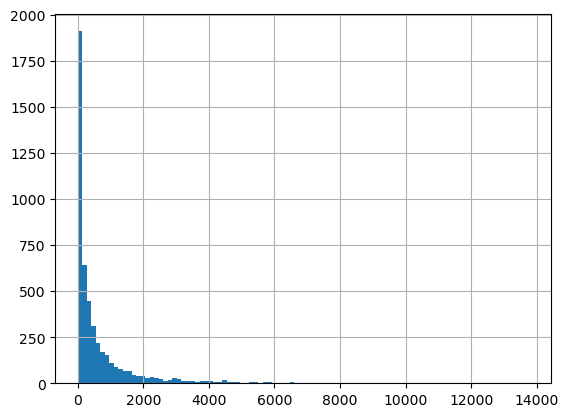

In [10]:
movies['vote_count'].hist(bins=100)

In [11]:
movies = movies[movies['vote_count']>100]

<Axes: >

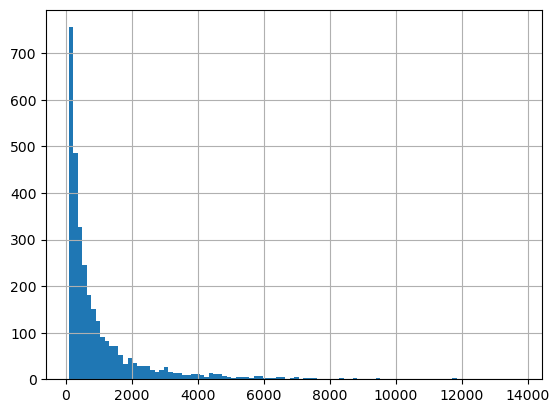

In [12]:
movies['vote_count'].hist(bins=100)

In [13]:
movies.shape

(3150, 21)

<Axes: >

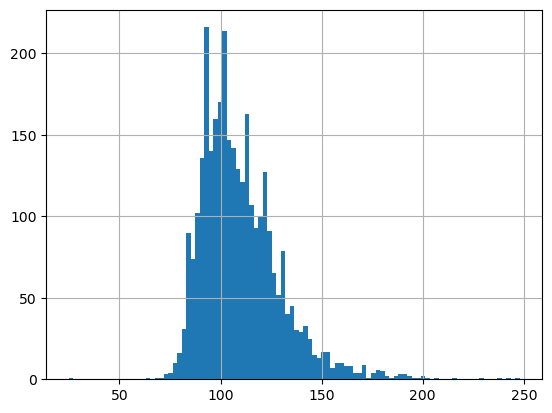

In [14]:
movies['runtime'].hist(bins=100)

In [15]:
movies['runtime'] = movies['runtime'].apply(lambda x: f'{int(x//60)}h {int(x%60)}m')

<Axes: >

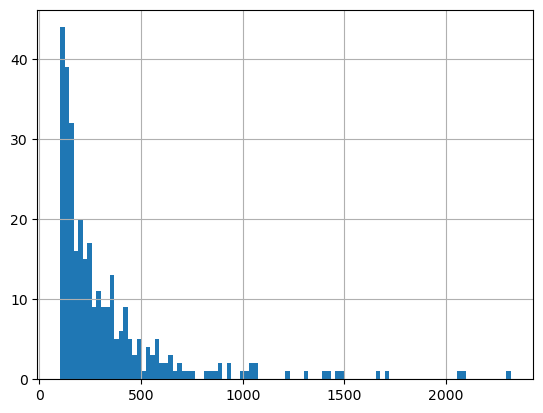

In [16]:
movies[movies['budget'] < 1000000]['vote_count'].hist(bins=100)

In [17]:
movies = movies[movies['budget']>1000000]

In [18]:
movies.shape

(2815, 21)

In [19]:
movies['budget']

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4535      2000000
4586     35000000
4596      6000000
4720      8500000
4758      4000000
Name: budget, Length: 2815, dtype: int64

In [20]:
movies['budget']

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4535      2000000
4586     35000000
4596      6000000
4720      8500000
4758      4000000
Name: budget, Length: 2815, dtype: int64

In [21]:
movies['budget'] = movies['budget'].apply(lambda x: str(int(x/1000000))+'m usd')

In [22]:
movies['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4535    A samurai answers a village's request for prot...
4586    During a wild vacation in Las Vegas, career wo...
4596    As he helps a young artist with her upcoming e...
4720    Nat Turner, a former slave in America, leads a...
4758    Three college students on a road trip across t...
Name: overview, Length: 2815, dtype: object

In [23]:
movies[['title', 'overview']].drop_duplicates()

,title,overview
0,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,Spectre,A cryptic message from Bond’s past sends him o...
3,The Dark Knight Rises,Following the death of District Attorney Harve...
4,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...
4535,Seven Samurai,A samurai answers a village's request for prot...
4586,What Happens in Vegas,"During a wild vacation in Las Vegas, career wo..."
4596,Maniac,As he helps a young artist with her upcoming e...
4720,The Birth of a Nation,"Nat Turner, a former slave in America, leads a..."


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [25]:
movies['overview'] = movies['overview'].fillna('')

In [26]:
Tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = Tfidf.fit_transform(movies['overview'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [27]:
def get_scores(title, cosine_sim):
    title_id = np.where(movies['title']==title)[0][0]
    scores = []
    for key, value in enumerate(cosine_sim[title_id]):
        scores.append([key, value])
    return scores
    
def get_recommendations(scores):
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    for i in scores[0:10]:
        print(movies.iloc[i[0]]['title'])
        
scores = get_scores('The Dark Knight Rises', cosine_sim)
get_recommendations(scores)

The Dark Knight Rises
The Dark Knight
Batman Forever
Batman Returns
Batman
Batman: The Dark Knight Returns, Part 2
Batman Begins
JFK
Batman v Superman: Dawn of Justice
Batman & Robin


In [28]:
cosine_sim_df = pd.DataFrame(cosine_sim)

In [29]:
cosine_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2805,2806,2807,2808,2809,2810,2811,2812,2813,2814
0,1.000000,0.00000,0.0,0.026531,0.000000,0.027661,0.000000,0.038671,0.000000,0.000000,...,0.0,0.013300,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.000000,1.00000,0.0,0.000000,0.031130,0.000000,0.000000,0.020875,0.000000,0.000000,...,0.0,0.000000,0.000000,0.011841,0.000000,0.000000,0.03698,0.039637,0.075414,0.000000
2,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,0.033902,0.026171,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.026531,0.00000,0.0,1.000000,0.010521,0.005601,0.012912,0.025901,0.021112,0.127554,...,0.0,0.019521,0.028486,0.000000,0.034126,0.000000,0.00000,0.000000,0.000000,0.014908
4,0.000000,0.03113,0.0,0.010521,1.000000,0.000000,0.009282,0.035435,0.000000,0.017895,...,0.0,0.004486,0.013807,0.008215,0.000000,0.013133,0.00000,0.000000,0.000000,0.000000


In [30]:
title_id = np.where(movies['title']=='The Dark Knight Rises')[0][0]
scores = []
for key, value in enumerate(cosine_sim[title_id]):
    scores.append([key, value])

scores

[[0, 0.026530763635299298],
 [1, 0.0],
 [2, 0.0],
 [3, 0.9999999999999996],
 [4, 0.01052054222778397],
 [5, 0.005600571741156558],
 [6, 0.012911824195722463],
 [7, 0.025900530342507062],
 [8, 0.021111756542489608],
 [9, 0.12755428809803832],
 [10, 0.0],
 [11, 0.0],
 [12, 0.0],
 [13, 0.0],
 [14, 0.0],
 [15, 0.004431459608585126],
 [16, 0.01970700003361105],
 [17, 0.0],
 [18, 0.007110699200780618],
 [19, 0.011165607568546551],
 [20, 0.007200214106018252],
 [21, 0.03074085935556596],
 [22, 0.0],
 [23, 0.0],
 [24, 0.019508879103001833],
 [25, 0.018707239328590374],
 [26, 0.019833040916665247],
 [27, 0.0],
 [28, 0.008992016791985216],
 [29, 0.026932147740488185],
 [30, 0.018402277492446766],
 [31, 0.028433710142181493],
 [32, 0.020613989252257704],
 [33, 0.0],
 [34, 0.0],
 [35, 0.0],
 [36, 0.02973353661301499],
 [37, 0.0],
 [38, 0.031140106124097164],
 [39, 0.010894753203847217],
 [40, 0.0],
 [41, 0.02037335287753896],
 [42, 0.008439298473411464],
 [43, 0.0],
 [44, 0.0],
 [45, 0.00851358751

In [31]:
cosine_sim_df.to_csv('files/cosine_sim.csv', index=False)

In [34]:
movies[['budget', 'genres', 'homepage', 'overview', 'production_companies', 'production_countries', 'release_date', 'runtime',
       'spoken_languages', 'title', 'vote_average','cast']].to_csv('files/cb_movies.csv', index=False)